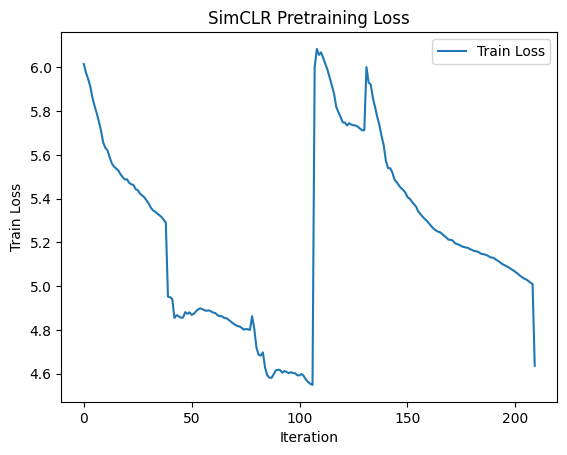

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('train_loss.txt', header=None, names=['epoch', 'it', 'train_loss', 'cosine_sim'])

plt.plot(df.index[:210], df['train_loss'][:210], label='Train Loss')
plt.xlabel('Iteration')
plt.ylabel('Train Loss')
plt.title('SimCLR Pretraining Loss')
plt.legend()
plt.show()

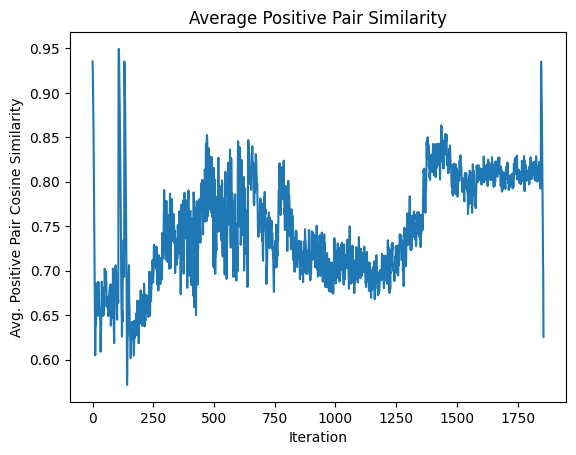

In [56]:
plt.plot(df.index, df['cosine_sim'])
plt.xlabel('Iteration')
plt.ylabel('Avg. Positive Pair Cosine Similarity')
plt.title('Average Positive Pair Similarity')
plt.show()

In [14]:
import sys
sys.path.append('..')

from model import *

model = UNet_Encoder()
print(model)

UNet_Encoder(
  (conv0): MinkowskiConvolution(in=1, out=32, kernel_size=[5, 5, 5], stride=[1, 1, 1], dilation=[1, 1, 1])
  (bn0): MinkowskiBatchNorm(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1): MinkowskiConvolution(in=32, out=32, kernel_size=[2, 2, 2], stride=[2, 2, 2], dilation=[1, 1, 1])
  (bn1): MinkowskiBatchNorm(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (block1): ResidualBlock(
    (conv1): MinkowskiConvolution(in=32, out=64, kernel_size=[3, 3, 3], stride=[1, 1, 1], dilation=[1, 1, 1])
    (bn1): MinkowskiBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): MinkowskiConvolution(in=64, out=64, kernel_size=[3, 3, 3], stride=[1, 1, 1], dilation=[1, 1, 1])
    (bn2): MinkowskiBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsample): MinkowskiConvolution(in=32, out=64, kernel_size=[1, 1, 1], stride=[1, 1, 1], dilation=[1, 1, 1])
  )
  (conv2): Minkow

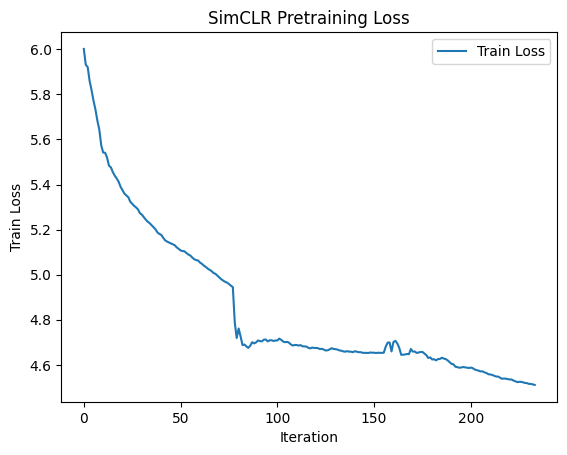

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('train_loss_no_norm.txt', header=None, names=['epoch', 'it', 'train_loss', 'cosine_sim'])

plt.plot(df.index, df['train_loss'], label='Train Loss')
plt.xlabel('Iteration')
plt.ylabel('Train Loss')
plt.title('SimCLR Pretraining Loss')
plt.legend()
plt.show()

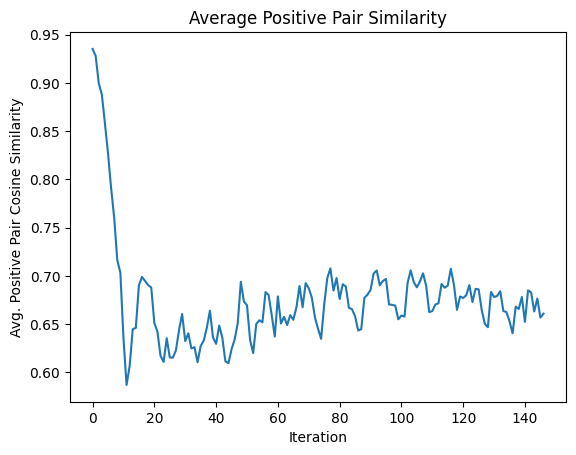

In [58]:
plt.plot(df.index, df['cosine_sim'])
plt.xlabel('Iteration')
plt.ylabel('Avg. Positive Pair Cosine Similarity')
plt.title('Average Positive Pair Similarity')
plt.show()

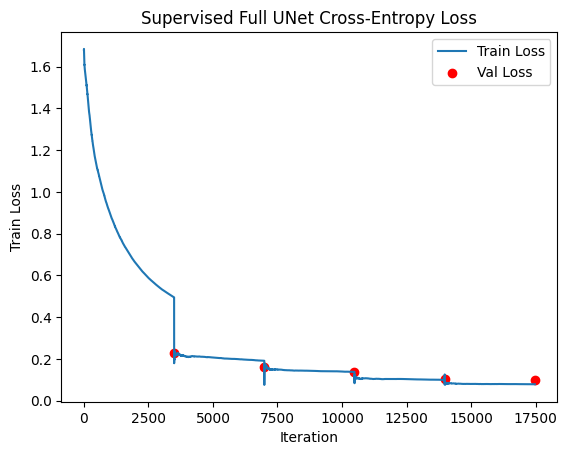

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('supervised_loss.txt', header=None, names=['epoch', 'it', 'train_loss', 'train_acc'])
df2 = pd.read_csv('supervised_val_stats.txt', header=None, names=['epoch', 'it', 'val_loss', 'val_acc'])

plt.plot(df.index, df['train_loss'], label='Train Loss')
plt.scatter(np.array([i * 3494 for i in range(1, 6)]), df2['val_loss'], label='Val Loss', color='red')
plt.xlabel('Iteration')
plt.ylabel('Train Loss')
plt.title('Supervised Full UNet Cross-Entropy Loss')
plt.legend()
plt.show()

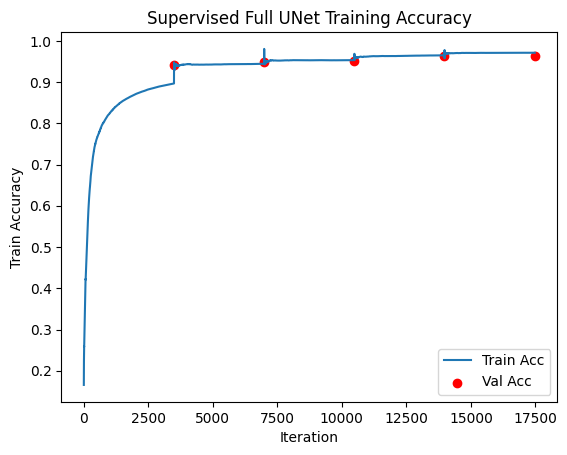

In [42]:
plt.plot(df.index, df['train_acc'], label='Train Acc')
plt.scatter(np.array([i * 3494 for i in range(1, 6)]), df2['val_acc'], label='Val Acc', color='red')
plt.xlabel('Iteration')
plt.ylabel('Train Accuracy')
plt.title('Supervised Full UNet Training Accuracy')
plt.legend()
plt.show()

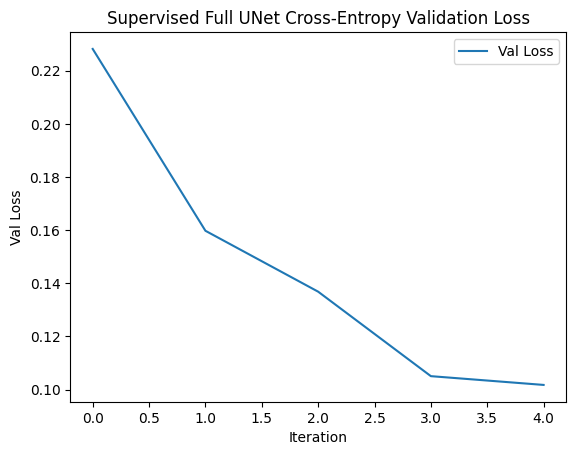

In [43]:
df = pd.read_csv('supervised_val_stats.txt', header=None, names=['epoch', 'it', 'val_loss', 'val_acc'])

plt.plot(df.index, df['val_loss'], label='Val Loss')
plt.xlabel('Iteration')
plt.ylabel('Val Loss')
plt.title('Supervised Full UNet Cross-Entropy Validation Loss')
plt.legend()

In [39]:
from model import *
from supervised_model import *

encoder = UNet_Encoder()
decoder = UNet_Decoder()
seg_head = Segmentation_Head()
checkpoint = torch.load("checkpoint.pth", map_location='cuda')  # or 'cpu'
model = Full_UNet(encoder, decoder, seg_head)
model.load_state_dict(checkpoint['model_state_dict'])



test_acc, test_acc_per_class, class_total = test_supervised_unet(model, test_loader)

/usr/local/lib/python3.10/dist-packages/MinkowskiEngine/__init__.py:36: UserWarning: The environment variable `OMP_NUM_THREADS` not set. MinkowskiEngine will automatically set `OMP_NUM_THREADS=16`. If you want to set `OMP_NUM_THREADS` manually, please export it on the command line before running a python script. e.g. `export OMP_NUM_THREADS=12; python your_program.py`. It is recommended to set it below 24.
  warnings.warn(
/lscratch/carsmith/tmp/ipykernel_3435440/2579992551.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary object

NameError: name 'test_loader' is not defined